In [1]:
!pip install easyocr

     |████████████████████████████████| 63.2MB 44kB/s 


In [5]:
# Importing necessary modules
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import easyocr

%matplotlib inline

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def get_bigger_box(res):
    biggerBox = []
    area = 0
    minY = 1000
    for i in res:
        box = []
        box.append(i[0][0])
        box.append(i[0][2])
        print(i)
        box = [item for sublist in box for item in sublist]
        box = [int(item) for item in box]
        textArea = abs((box[0] - box[1]) * (box[2] - box[3]))
        if textArea > area and box[1] < minY:
            minY = box[1]
            area = textArea
            biggerBox = box
    return biggerBox

In [7]:
def crop_lettering(final, biggerText):
    top_left = (biggerText[0], biggerText[1])
    bottom_right = (biggerText[2], biggerText[3])
    imag = final[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]]
    return imag

In [8]:
def readText(filename):
    # Using EasyOCR to detect text boxes
    reader = easyocr.Reader(['pt', 'en'], recognizer='Transformer')
    res = reader.readtext(filename)
    return res

In [9]:
def rec(filenameOpen, valterBox):
    imag = cv2.imread(filenameOpen)
    imag = cv2.rectangle(imag, (valterBox[0], valterBox[1]), (valterBox[2], valterBox[3]), (0, 255, 0))
    return imag

In [3]:
# Returns the similarity between two strings
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


([[188, 46], [250, 46], [250, 78], [188, 78]], '554', 0.4779344025942491)
([[268, 32], [446, 32], [446, 75], [268, 75]], 'Taqvara', 0.6012665476502591)
([[223, 213], [251, 213], [251, 229], [223, 229]], '4,05', 0.9850239157676697)
([[191, 234], [296, 234], [296, 275], [191, 275]], 'CAmori', 0.1537830004921173)
([[249, 345], [287, 345], [287, 359], [249, 359]], 'C0o2', 0.17337965965270996)
([[451, 387], [509, 387], [509, 403], [451, 403]], 'Loe 4413', 0.7525683583232532)


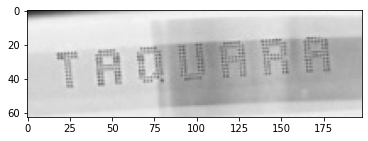

Taqvara
([[337, 21], [463, 21], [463, 63], [337, 63]], 'NITEROI', 0.3029448170252371)
([[393, 72], [538, 72], [538, 117], [393, 117]], 'Penootba', 0.44298342270034313)
([[487, 191], [515, 191], [515, 207], [487, 207]], 'BRS', 0.9236580729484558)
([[279, 209], [367, 209], [367, 245], [279, 245]], 'MONTE', 0.375292666599679)
([[94, 220], [170, 220], [170, 276], [94, 276]], 'Kily', 0.09497236460447311)
([[392, 272], [437, 272], [437, 289], [392, 289]], 'Cu2', 0.04257805636376884)
([[424, 280], [494, 280], [494, 304], [424, 304]], 'RJ 211041', 0.855170397530339)
([[304, 292], [381, 292], [381, 312], [304, 312]], 'Pendotiba', 0.9899925734479772)
([[395, 343], [449, 343], [449, 359], [395, 359]], 'LRu 7219 ', 0.33659002236151986)


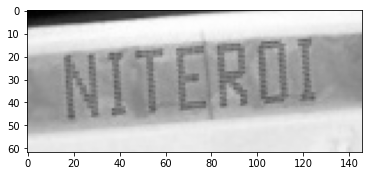

NITEROI
([[300, 23], [483, 23], [483, 65], [300, 65]], 'Ta n @ U E', 0.1829940452447427)
([[376, 80], [400, 80], [400, 108], [376, 108]], '6', 0.23788288363312576)
([[247, 199], [277, 199], [277, 215], [247, 215]], '4,05', 0.5330272982600454)
([[237, 222], [338, 222], [338, 249], [237, 249]], 'Fassoe', 0.21944239426687098)
([[243, 236], [380, 236], [380, 267], [243, 267]], 'GaroeI', 0.09138135817277102)
([[416, 250], [503, 250], [503, 267], [416, 267]], 'AR-condicionado', 0.5566608606010132)
([[337, 281], [450, 281], [450, 306], [337, 306]], '7EOBUS', 0.13505842982292818)
([[299, 345], [353, 345], [353, 365], [299, 365]], '(30188', 0.5985000945797804)
([[362, 384], [430, 384], [430, 408], [362, 408]], "'Lse 6309'", 0.3744994382605703)


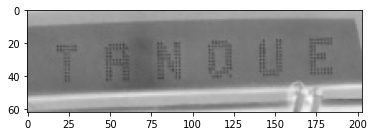

Tan @ U E
([[209, 219], [245, 219], [245, 233], [209, 233]], '429049', 0.855175271655074)
([[155.65739357167092, 27.125914857336728], [309.9045232973685, 13.249170848299299], [311.3426064283291, 38.874085142663276], [157.0954767026315, 52.7508291517007]], '275 MEIER', 0.8879993867844395)


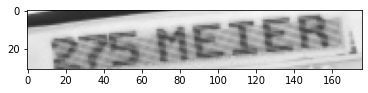

375
([[266, 36], [318, 36], [318, 68], [266, 68]], '505', 0.9118810286224748)
([[334, 31], [451, 31], [451, 68], [334, 68]], 'Alcantara', 0.9835060706442779)
([[283, 191], [361, 191], [361, 211], [283, 211]], 'Rs 965', 0.30064850566982115)
([[117, 227], [167, 227], [167, 271], [117, 271]], 'HMn', 0.10966562518675861)
([[412, 278], [473, 278], [473, 299], [412, 299]], 'aJ117,061', 0.17644833263856174)
([[369, 331], [419, 331], [419, 347], [369, 347]], 'Kys 9742', 0.36510653785657)


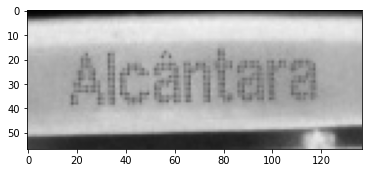

Alcantara
([[236, 78], [270, 78], [270, 108], [236, 108]], 'Jio', 0.1571998149213676)
([[293, 77], [341, 77], [341, 97], [293, 97]], 'Heves', 0.6510396753096853)
([[243, 173], [327, 173], [327, 193], [243, 193]], 'BU R 855', 0.6725923816956733)
([[348, 230], [407, 230], [407, 243], [348, 243]], 'N01 ~Foi', 0.016986098487956847)
([[398, 243], [465, 243], [465, 267], [398, 267]], 'RJ 117.060', 0.487263209763694)
([[363, 319], [411, 319], [411, 333], [363, 333]], 'Kyh 0954', 0.12851049735392567)


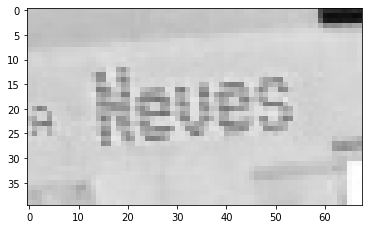

Heves
([[259, 43], [323, 43], [323, 79], [259, 79]], '394', 0.9980572398915483)
([[337, 41], [505, 41], [505, 77], [337, 77]], 'WILG KeNMEDY', 0.11252603084579375)
([[105, 287], [145, 287], [145, 323], [105, 323]], '886', 0.04809555353546722)
([[402, 309], [459, 309], [459, 326], [402, 326]], 'Marcopoio', 0.9697708914767367)
([[9, 495], [31, 495], [31, 505], [9, 505]], 'A', 0.027178469195646926)
([[32, 492], [139, 492], [139, 505], [32, 505]], 'Guduc Odcu', 0.018045669875839502)
([[531.7805784783006, 409.4147520217908], [588.7818122938039, 403.09162510511953], [591.2194215216994, 425.5852479782092], [534.2181877061961, 430.90837489488047]], 'Lxsis', 0.7212971323410553)


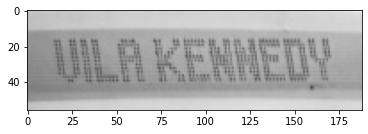

UILA KEMNEDY
([[302, 63], [412, 63], [412, 111], [302, 111]], 'ILhA', 0.5123452544212341)
([[328, 192], [404, 192], [404, 220], [328, 220]], 'Rs 8,00', 0.7689968961592923)
([[212, 226], [240, 226], [240, 252], [212, 252]], 'M', 0.4981516162495758)
([[436.01941932430907, 255.8038838648618], [481.95087143148675, 249.69041395253922], [482.98058067569093, 258.1961161351382], [437.04912856851325, 264.3095860474608]], 'trcuuoo', 0.005934508793127361)
([[389.6546544120074, 296.5201198532081], [432.8159187690009, 293.1618836450765], [434.3453455879926, 310.4798801467919], [390.1840812309991, 312.8381163549235]], '810416', 0.9843961232935132)


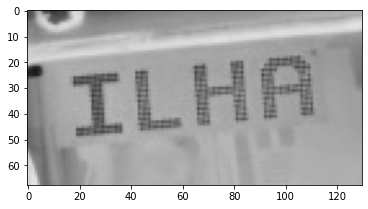

ILhA
([[228, 32], [276, 32], [276, 64], [228, 64]], '397', 0.4350477193261916)
([[294, 32], [406, 32], [406, 64], [294, 64]], 'parad', 0.4097421850796593)
([[193, 211], [313, 211], [313, 251], [193, 251]], 'DINA-AU', 0.7786947550704515)
([[345, 287], [391, 287], [391, 301], [345, 301]], 'Caio', 0.20877856016159058)
([[265, 309], [309, 309], [309, 325], [265, 325]], '052551', 0.1559707281059854)
([[339, 367], [401, 367], [401, 385], [339, 385]], 'Kxy72i5', 0.4633387924423815)


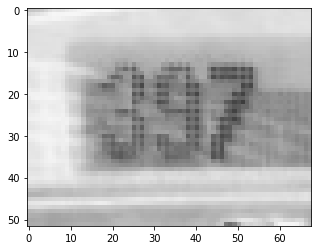

397
([[171, 29], [424, 29], [424, 91], [171, 91]], '292VIA _ Eoxsutysyà', 0.03803547016548985)
([[316, 318], [371, 318], [371, 337], [316, 337]], 'Coin', 0.18926411867141724)
([[239, 351], [289, 351], [289, 371], [239, 371]], 'B55086', 0.8974163198620235)
([[314, 404], [383, 404], [383, 432], [314, 432]], '1B 3220', 0.24894624630976436)


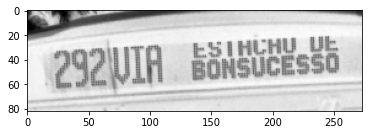

292VIA _ B;lguuiysyb
([[387, 27], [555, 27], [555, 65], [387, 65]], '7ahariopolis', 0.0677333892183794)
([[145, 231], [175, 231], [175, 245], [145, 245]], '25', 0.13216429401446272)
([[174, 214], [220, 214], [220, 244], [174, 244]], '(5564', 0.31291888983550553)
([[500, 254], [537, 254], [537, 268], [500, 268]], 'Coid', 0.1509440392255783)
([[446, 286], [483, 286], [483, 304], [446, 304]], 'C51564', 0.8416230304220232)
([[502.51341170750567, 320.6620705367551], [546.7979797376745, 316.1240611534406], [548.4865882924944, 332.3379294632449], [504.20202026232545, 336.8759388465594]], '0k8j0]_', 0.03175877857545121)


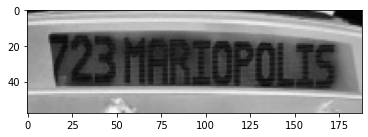

[2ahariopolis
([[135, 139], [315, 139], [315, 181], [135, 181]], '540D STA IZABEL', 0.9479105121639249)
([[142, 279], [221, 279], [221, 315], [142, 315]], '[TRiBOBQ', 0.13140517528292606)
([[240, 302], [292, 302], [292, 321], [240, 321]], 'URBAN', 0.9214975308336699)
([[256, 358], [313, 358], [313, 378], [256, 378]], 'RJ101.101', 0.3651709930844657)


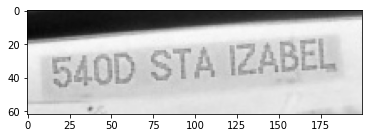

540D STA IZABEL
([[120, 14], [368, 14], [368, 66], [120, 66]], '371 praca SecA', 0.2881535550796696)
([[132, 98], [222, 98], [222, 124], [132, 124]], 'Wn', 0.01508187952895626)
([[260, 200], [284, 200], [284, 226], [260, 226]], 'G', 0.1838955759586094)
([[335, 205], [365, 205], [365, 221], [335, 221]], '005', 0.1824924055382209)
([[196, 220], [250, 220], [250, 244], [196, 244]], 'BRSG', 0.5867516994476318)
([[265, 227], [403, 227], [403, 243], [265, 243]], 'GAR CONDICIONADO', 0.5258519463005643)
([[183, 315], [271, 315], [271, 335], [183, 335]], 'NOVACAP', 0.9429695587965609)
([[310, 308], [352, 308], [352, 332], [310, 332]], '951512', 0.3499310451377073)
([[233, 361], [291, 361], [291, 377], [233, 377]], 'LLR 2597', 0.5495222551807663)


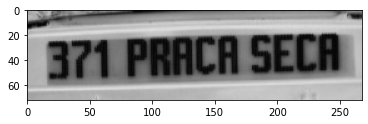

371 PRACA SECA
([[195, 11], [460, 11], [460, 85], [195, 85]], 'Testr Daposse', 0.06869593224068538)
([[218, 112], [308, 112], [308, 140], [218, 140]], 'BENVnO?', 0.044860267100633046)
([[273, 345], [323, 345], [323, 361], [273, 361]], '01s', 0.2715316706373123)
([[336.219131190557, 311.37530495244556], [389.93708211483266, 305.65089097682704], [391.780868809443, 320.62469504755444], [337.06291788516734, 325.34910902317296]], 'uu', 0.03449268395522183)


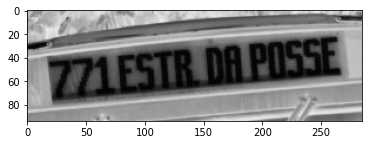

DAPOSSE
([[352, 19], [541, 19], [541, 70], [352, 70]], 'DLPENHA', 0.795304694541793)
([[471, 93], [579, 93], [579, 119], [471, 119]], 'AR(ON/cIokAds |', 0.027684034772302402)
([[373, 105], [419, 105], [419, 149], [373, 149]], 'Ite', 0.13927164728432945)
([[102, 196], [187, 196], [187, 233], [102, 233]], 'EgPamal', 0.05569531134840594)
([[375, 201], [473, 201], [473, 237], [375, 237]], 'EoDLRo', 0.1161085118357551)
([[487, 199], [539, 199], [539, 241], [487, 241]], '6', 0.9790980730397223)
([[467, 271], [509, 271], [509, 285], [467, 285]], 'cnid', 0.130212664604187)
([[511, 296], [566, 296], [566, 317], [511, 317]], 'RJ 188117', 0.992208902187437)
([[470, 345], [517, 345], [517, 363], [470, 363]], '40GE', 0.2187032550573349)


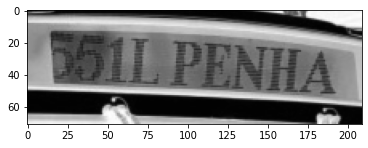

DLPENHA
([[285, 26], [512, 26], [512, 65], [285, 65]], '7s8 GoeLHo NETO', 0.11935241413865122)
([[331, 183], [355, 183], [355, 197], [331, 197]], '4,05', 0.5396432492656055)
([[306, 203], [397, 203], [397, 223], [306, 223]], 'ESTRADA Do', 0.3615221232893503)
([[364, 211], [419, 211], [419, 232], [364, 232]], 'MENTO', 0.8948561519206855)
([[145, 237], [185, 237], [185, 273], [145, 273]], '8M4', 0.08630294779638445)
([[384, 252], [479, 252], [479, 272], [384, 272]], '75085', 0.08340884424035505)
([[364, 310], [386, 310], [386, 318], [364, 318]], '74l', 0.3516636064718262)
([[411, 343], [465, 343], [465, 359], [411, 359]], 'Lse 6306', 0.4204520791221235)


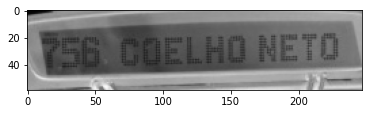

756 GoELHo NETO
([[242, 32], [490, 32], [490, 80], [242, 80]], '378 MHERMES', 0.9972235438581133)
([[371, 301], [423, 301], [423, 315], [371, 315]], 'Edid', 0.12313443422317505)
([[291, 325], [339, 325], [339, 345], [291, 345]], 'B11506', 0.8307061527879193)
([[365, 393], [425, 393], [425, 411], [365, 411]], 'Lov 2106', 0.37909455622679794)


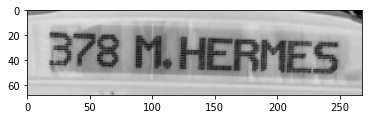

378 MHERMES
([[171, 43], [193, 43], [193, 63], [171, 63]], 'TwV', 0.04954832353284876)
([[286, 16], [530, 16], [530, 64], [286, 64]], '378 CASTELO', 0.8347892174969788)
([[275, 215], [371, 215], [371, 233], [275, 233]], 'RoDoua', 0.03151674509077153)
([[475, 213], [507, 213], [507, 233], [475, 233]], 'Tàos', 0.24617722630500793)
([[287, 227], [367, 227], [367, 247], [287, 247]], 'HouOP', 0.024647968091824377)
([[473, 239], [583, 239], [583, 255], [473, 255]], 'AR ondicionado', 0.4190851080568584)
([[415, 303], [467, 303], [467, 317], [415, 317]], 'Eud', 0.12474379684792783)
([[351, 333], [419, 333], [419, 349], [351, 349]], 'VILA REAL', 0.962226226044759)
([[500, 326], [542, 326], [542, 350], [500, 350]], '811596', 0.16481911403184857)


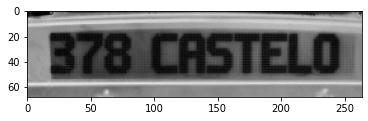

378 CASTELO
([[429, 67], [565, 67], [565, 81], [429, 81]], '4r (0 n d ico n ^ d @', 0.08623618678973326)
([[277, 73], [411, 73], [411, 111], [277, 111]], 'PRES Vargas', 0.26658089027484894)
([[95, 147], [152, 147], [152, 175], [95, 175]], 'Lhn', 0.039989674329365)
([[140, 208], [172, 208], [172, 240], [140, 240]], 'H', 0.1487262282026336)
([[282, 216], [362, 216], [362, 244], [282, 244]], 'Rs &f', 0.17628590039928949)
([[434, 248], [470, 248], [470, 256], [434, 256]], 'Cre', 0.03546552309530242)
([[369, 307], [425, 307], [425, 323], [369, 323]], 'Lideal', 0.6160782700999573)
([[462, 302], [503, 302], [503, 320], [462, 320]], '828727', 0.5617377870871277)
([[429, 347], [469, 347], [469, 359], [429, 359]], 'TuJe42', 0.09098253977990377)
([[45.05131670194949, 137.15395010584845], [106.92397936868251, 147.32892276784335], [101.94868329805051, 172.84604989415155], [40.07602063131749, 162.67107723215665]], 'Saa', 0.07209401707416353)
([[301.4452998037748, 211.16794970566215], [356.9985157079

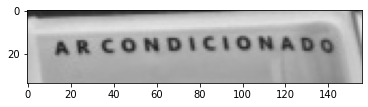

Cond icio n ad o
([[349, 4], [535, 4], [535, 54], [349, 54]], '@2CASIELO', 0.235459662339214)
([[341, 75], [365, 75], [365, 95], [341, 95]], 'Va', 0.9021460049240757)
([[459, 64], [574, 64], [574, 91], [459, 91]], 'ArqAgoin', 0.021105719402634233)
([[347, 155], [437, 155], [437, 193], [347, 193]], 'Rs395', 0.5979019371400728)
([[173, 219], [195, 219], [195, 235], [173, 235]], '06:', 0.10283720355631544)
([[191, 199], [235, 199], [235, 235], [191, 235]], 'BI6', 0.051651616450746105)
([[89, 233], [113, 233], [113, 245], [89, 245]], '?5', 0.011224197599171194)
([[409, 251], [443, 251], [443, 265], [409, 265]], 'B25601', 0.8109988410772219)
([[463.18076807948097, 285.42653765563665], [509.92996072017394, 280.6323411106289], [511.81923192051903, 293.57346234436335], [465.07003927982606, 298.3676588893711]], 'Lyl 9905', 0.07203686976307952)
([[264, 44], [326, 44], [326, 74], [264, 74]], 'HMt 8', 0.1958327482676759)
([[346, 36], [501, 36], [501, 75], [346, 75]], 'REGRETO', 0.839865160258812)


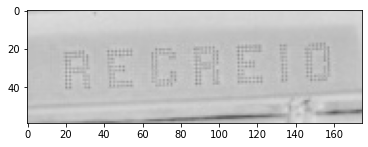

REGRETO
([[379, 14], [556, 14], [556, 59], [379, 59]], '7ohp LagoiNha', 0.4364777477944567)
([[353, 150], [468, 150], [468, 199], [353, 199]], "'KM32", 0.6952896945807067)
([[176, 215], [251, 215], [251, 242], [176, 242]], 'Funeoraid', 0.03973372713409916)
([[420, 229], [489, 229], [489, 246], [420, 246]], 'FoNe Coecata', 0.037196406565444436)
([[372, 236], [410, 236], [410, 264], [372, 264]], '00', 0.7269973661316386)
([[534.3615361589619, 220.85307531127333], [592.847183327, 213.23324465671698], [594.6384638410381, 230.14692468872667], [536.152816673, 236.76675534328302]], 'Rj190099', 0.12486917676199384)
([[488.2567058537528, 279.33103526837755], [529.9166959647084, 275.6004145794861], [530.7432941462472, 289.66896473162245], [489.0833040352916, 293.3995854205139]], 'Kay 4274', 0.05194932552236598)


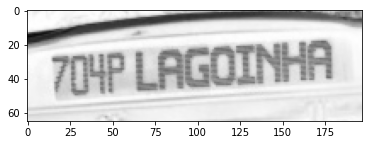

7OHP LAgoinha
([[85, 29], [341, 29], [341, 93], [85, 93]], '455 RIOSUL', 0.5318288127170766)
([[151, 205], [181, 205], [181, 219], [151, 219]], '4,05', 0.9940315864654324)
([[71, 234], [200, 234], [200, 275], [71, 275]], 'PRES VnRGMS', 0.11933978377115696)
([[140, 339], [187, 339], [187, 359], [140, 359]], 'B71096', 0.7649078870263778)
([[216, 390], [285, 390], [285, 419], [216, 419]], 'LMC 7546', 0.22858288896876186)


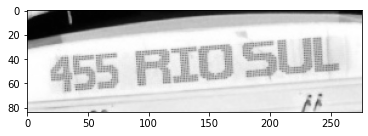

455 RIOSUL
([[349, 23], [403, 23], [403, 59], [349, 59]], '1191', 0.13417033851146698)
([[414, 25], [507, 25], [507, 63], [414, 63]], 'CAXIAS', 0.5243403895858054)
([[366, 172], [428, 172], [428, 200], [366, 200]], '0qn', 0.13741375907262177)
([[54, 178], [120, 178], [120, 228], [54, 228]], 'R0', 0.014474086664396356)
([[383, 255], [427, 255], [427, 271], [383, 271]], 'Reginas', 0.9969945988896745)
([[467, 253], [523, 253], [523, 267], [467, 267]], 'Au 770.049', 0.03705822810295603)


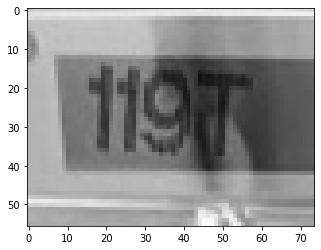

Ii9T
([[355, 17], [401, 17], [401, 53], [355, 53]], '070', 0.3645272710266978)
([[415, 15], [531, 15], [531, 57], [415, 57]], 'PARADOR', 0.25127385596711316)
([[370, 156], [402, 156], [402, 180], [370, 180]], '405', 0.28027967651133995)
([[361, 181], [447, 181], [447, 217], [361, 217]], 'oeasa', 0.4220654976107203)
([[419, 291], [471, 291], [471, 305], [419, 305]], 'VILA ReAl', 0.3932677443721762)
([[466, 324], [515, 324], [515, 345], [466, 345]], 'Krvsoie', 0.15332681926010047)
([[149.41000317999047, 73.45600508798474], [243.49146661382073, 39.32889434438853], [249.58999682000953, 62.543994912015265], [156.50853338617927, 97.67110565561147]], 'Twicuohado', 0.02048274547781693)
([[466.219131190557, 261.37530495244556], [507.93334560620303, 257.6410209206911], [508.780868809443, 270.62469504755444], [467.06665439379697, 273.3589790793089]], 'Eoid', 0.06406225264072418)


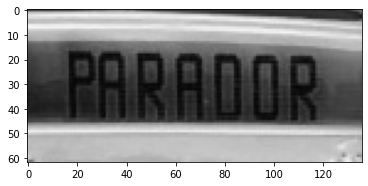

PARADOR
([[324, 43], [424, 43], [424, 74], [324, 74]], 'Uia Kennedy', 0.47574295898781505)
([[225, 55], [347, 55], [347, 99], [225, 99]], '7535', 0.08814231306314468)
([[240, 179], [374, 179], [374, 210], [240, 210]], 'AR CoNDICIC  ADi)', 0.27029381206232955)
([[251.65465441200737, 214.52011985320812], [285.5224864609734, 208.70306708880042], [288.3453455879926, 228.47988014679188], [255.47751353902657, 234.29693291119958]], '4,05', 0.843481719493866)
([[368.1055728090001, 237.55278640450004], [409.9411946707617, 233.66213524639323], [410.8944271909999, 243.44721359549996], [369.0588053292383, 248.33786475360677]], 'copoio', 0.6311549430253496)
([[442.51341170750567, 287.6620705367551], [490.8293732081895, 283.19167230335813], [492.48658829249433, 299.3379294632449], [444.1706267918105, 303.80832769664187]], 'D86148', 0.6655265943962445)
([[286.51341170750567, 307.6620705367551], [348.87668623363425, 302.3085892823453], [350.48658829249433, 319.3379294632449], [288.12331376636575, 324.

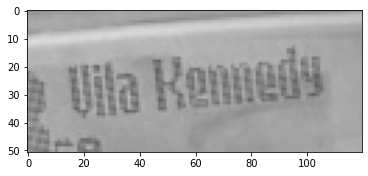

Uia Kenneds
([[338, 60], [508, 60], [508, 90], [338, 90]], '(rcoNDcDNDD', 0.11770672924491364)
([[148, 82], [323, 82], [323, 134], [148, 134]], "'West shoppwg", 0.11990046169858236)
([[305, 231], [351, 231], [351, 247], [305, 247]], 'RS 15,00', 0.47520340890643903)
([[208, 236], [300, 236], [300, 264], [208, 264]], '89x545', 0.04710733622478856)
([[318, 314], [411, 314], [411, 339], [318, 339]], 'Marcoroio', 0.2606327229908559)
([[388, 342], [445, 342], [445, 370], [388, 370]], 'D87835', 0.984005733301922)
([[339, 447], [393, 447], [393, 463], [339, 463]], '[TNO', 0.28090015053749084)
([[166.71019925882297, 240.29141844352822], [213.37124515652573, 236.16228500369255], [215.28980074117703, 266.7085815564718], [168.62875484347427, 270.83771499630745]], '459', 0.5029200668907279)


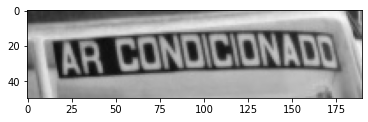

@rcoNDcDNDD
([[375, 32], [461, 32], [461, 77], [375, 77]], 'Marco', 0.2624036309412579)
([[341, 319], [383, 319], [383, 335], [341, 335]], '472129', 0.7414066687688019)
([[401, 353], [455, 353], [455, 369], [401, 369]], 'LRZ-7306', 0.5430560345800075)


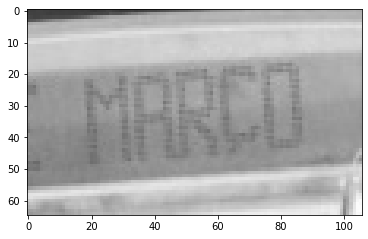

NARco
([[373, 21], [441, 21], [441, 64], [373, 64]], 'BRS3', 0.2870710492134094)
([[193, 49], [243, 49], [243, 85], [193, 85]], '457', 0.43400906477038015)
([[377, 241], [401, 241], [401, 257], [377, 257]], '405', 0.17629935901361607)
([[264, 343], [311, 343], [311, 363], [264, 363]], '842636', 0.8101447296724558)
([[231.9719194937464, 42.55226313936892], [371.71984288069575, 27.529364442515643], [375.02808050625356, 66.44773686063108], [235.28015711930428, 81.47063555748436]], "'ABOLICAO", 0.5602685718103838)
([[187.6712678358369, 229.5754088880901], [324.6033100345712, 215.0481965453418], [327.3287321641631, 257.42459111190993], [190.39668996542875, 271.9518034546582]], 'BotaFogo', 0.5686187027391824)
([[337.18076807948097, 305.42653765563665], [387.92711006570414, 299.6252108245026], [389.81923192051903, 313.57346234436335], [339.07288993429586, 319.3747891754974]], 'no', 0.02984133121183202)
([[342.43826238111393, 379.7506099048912], [402.82073295492523, 371.17239411139764], [404.5

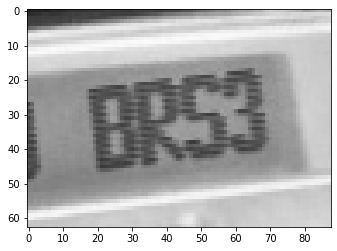

8R53
([[147, 19], [383, 19], [383, 81], [147, 81]], 'Z29LsaqWiceNi', 0.0677534980899924)
([[291, 90], [447, 90], [447, 127], [291, 127]], 'ARdF /soNADO', 0.05566623744661899)
([[182, 338], [278, 338], [278, 366], [182, 366]], 'RJ 128/336', 0.969962316676485)
([[288, 398], [356, 398], [356, 422], [288, 422]], 'KPF 5627', 0.09858849683790205)
([[287.18076807948097, 315.42653765563665], [341.93708211483266, 309.65089097682704], [342.81923192051903, 323.57346234436335], [289.06291788516734, 329.34910902317296]], 'CoTa', 0.04493570700287819)
([[352.28501414857493, 334.97100848914494], [424.88284718556383, 326.325547276813], [426.71498585142507, 343.02899151085506], [354.11715281443617, 351.674452723187]], 'FSFlA', 0.03370970569082747)


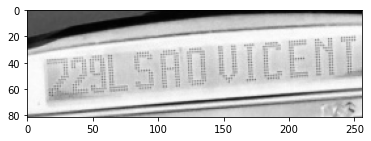

729L
([[134, 213], [235, 213], [235, 263], [134, 263]], 'IRAJA', 0.37898145032069874)
([[311, 237], [343, 237], [343, 257], [311, 257]], '405', 0.6401587724685669)
([[260, 297], [311, 297], [311, 315], [260, 315]], 'Z7n7', 0.006839906796813011)
([[211, 333], [275, 333], [275, 351], [211, 351]], 'VILA REAL', 0.8292516270976737)
([[261, 367], [325, 367], [325, 391], [261, 391]], 'KzI 8449', 0.33940704781146663)
([[197.00636944292776, 33.41464971873383], [348.6802803590974, 21.24074568062295], [349.99363055707227, 65.58535028126617], [198.31971964090258, 77.75925431937705]], 'PARADOR', 0.9950676569140334)
([[124.46498610038621, 41.24145691119725], [185.74918927682546, 35.691891814565764], [188.5350138996138, 81.75854308880275], [127.25081072317454, 87.30810818543424]], '378', 0.9999926356734838)
([[346.6546544120074, 321.5201198532081], [388.7275578017969, 316.9922579489518], [390.3453455879926, 335.4798801467919], [349.2724421982031, 340.0077420510482]], 'B1589', 0.11898049523555265)


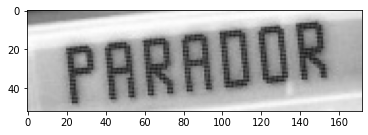

PARADOR
([[322, 50], [432, 50], [432, 80], [322, 80]], 'Mato Alto', 0.6682373350460341)
([[348, 74], [432, 74], [432, 98], [348, 98]], 'Vja Carr', 0.42098917071345593)
([[232, 185], [374, 185], [374, 214], [232, 214]], 'AR ConDICIC  ADY', 0.14336865880831784)
([[242, 212], [280, 212], [280, 236], [242, 236]], '485', 0.8882464075736212)
([[349, 249], [411, 249], [411, 261], [349, 261]], 'Marcopolo', 0.9805482115091105)
([[441, 305], [487, 305], [487, 321], [441, 321]], 'D86148', 0.9490016520114869)
([[276, 315], [339, 315], [339, 336], [276, 336]], 'JABOUR', 0.8481541761068382)
([[358, 371], [425, 371], [425, 398], [358, 398]], '[nizz2o', 0.0286155490837421)


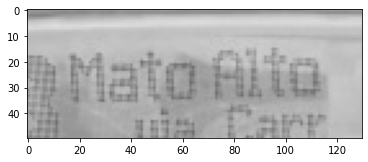

Mato Alto
([[202, 96], [311, 96], [311, 146], [202, 146]], 'UiaPedra', 0.9561922914980955)
([[251, 215], [283, 215], [283, 235], [251, 235]], '80', 0.1855420360341862)
([[279.51341170750567, 214.6620705367551], [313.6, 208.8], [316.48658829249433, 226.3379294632449], [282.4, 232.2]], 'R R', 0.35224261613260677)
([[249.51341170750567, 230.6620705367551], [306.78181229380397, 223.09162510511956], [309.48658829249433, 242.3379294632449], [252.21818770619603, 250.90837489488044]], 'HoPP', 0.13671696186065674)
([[422.51341170750567, 297.6620705367551], [466.79797973767455, 293.1240611534406], [468.48658829249433, 309.3379294632449], [424.20202026232545, 313.8759388465594]], 'D12164', 0.42812381589600784)
([[334.04217371477887, 326.71265211443364], [419.9694515404198, 314.75471708013475], [420.95782628522113, 324.28734788556636], [335.0305484595802, 336.24528291986525]], '(nonon', 0.050428329060588)
([[356.28501414857493, 349.97100848914494], [410.8245390671689, 342.18081919433234], [412.714

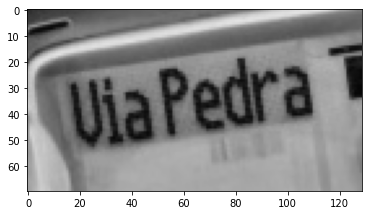

UiaPedra
([[397, 89], [449, 89], [449, 107], [397, 107]], 'ar cono', 0.7249660887264893)
([[295, 179], [325, 179], [325, 195], [295, 195]], '0,69', 0.1855359524488449)
([[298, 189], [421, 189], [421, 241], [298, 241]], 'DAcqondi ', 0.050530373506212714)
([[94, 232], [194, 232], [194, 284], [94, 284]], 'AHArRHHM', 0.07398380951909767)
([[326, 286], [361, 286], [361, 304], [326, 304]], 'GAlo', 0.22069352865219116)
([[336.7811992150991, 40.671798822648626], [475.73932679190153, 25.579635559665306], [478.2188007849009, 62.328201177351374], [339.26067320809847, 77.4203644403347]], "'coNdICIONADO", 0.12042345122843856)
([[274.2802656784306, 50.38855792470428], [347.3037994940064, 40.74502574218613], [350.7197343215694, 78.61144207529573], [277.6962005059936, 88.25497425781387]], '520AR (', 0.35833919371999784)
([[446.36153615896194, 85.85307531127334], [502.83642242574246, 78.2078177771307], [504.63846384103806, 95.14692468872666], [448.16357757425754, 101.7921822228693]], 'conado', 0.330307

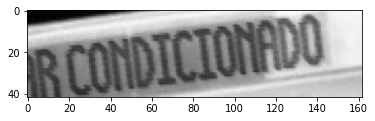

R
([[274, 25], [499, 25], [499, 82], [274, 82]], '378 MHERMES', 0.6873616759900034)
([[273, 221], [382, 221], [382, 262], [273, 262]], 'BEsssMag', 0.13300489512546687)
([[311, 241], [381, 241], [381, 257], [311, 257]], 'Rahes', 0.047217561450736155)
([[459, 243], [489, 243], [489, 263], [459, 263]], '40s', 0.3974645433980574)
([[495, 329], [533, 329], [533, 347], [495, 347]], 'B11589', 0.7604832744875801)
([[357, 341], [421, 341], [421, 355], [357, 355]], 'VIL A REAL', 0.6955126531131121)
([[405, 375], [468, 375], [468, 400], [405, 400]], 'KZi 8749', 0.34505165698683465)
([[406.219131190557, 308.37530495244556], [455.9403762257505, 304.65986391834554], [456.780868809443, 317.62469504755444], [407.0596237742495, 322.34013608165446]], 'enua', 0.0192047618329525)


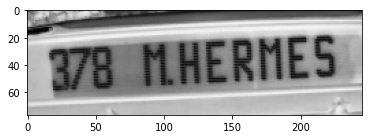

378 MHERMES
([[259, 16], [506, 16], [506, 76], [259, 76]], '371 praca SecA', 0.3578204866209277)
([[263, 101], [325, 101], [325, 121], [263, 121]], 'HORI', 0.27169862389564514)
([[243, 111], [334, 111], [334, 138], [243, 138]], 'Shoppi', 0.3571738013114945)
([[125, 249], [173, 249], [173, 289], [125, 289]], 'IUF', 0.016118979821187644)
([[391, 291], [439, 291], [439, 305], [391, 305]], 'Coid', 0.2524355351924896)
([[335, 311], [423, 311], [423, 340], [335, 340]], 'NOVACAP', 0.9162495376868147)
([[390, 361], [449, 361], [449, 381], [390, 381]], 'KRY 9157', 0.43063720135245553)
([[475.8375236125618, 306.3725330575865], [516.7393718304724, 303.01278896108323], [518.1624763874382, 323.6274669424135], [476.2606281695276, 325.98721103891677]], 'C51609', 0.4514788234018956)


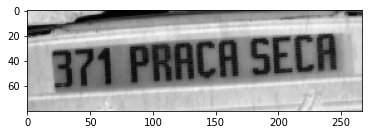

371 prACA SECA
([[325, 215], [361, 215], [361, 231], [325, 231]], 'Unico', 0.340019571244954)
([[397, 227], [429, 227], [429, 243], [397, 243]], 'BRS', 0.9992761971580293)
([[27, 215], [97, 215], [97, 283], [27, 283]], 'Cau |', 0.018422080911105424)
([[320, 265], [411, 265], [411, 281], [320, 281]], 'uoBU', 0.01589890755712986)
([[273, 313], [341, 313], [341, 329], [273, 329]], 'Crei', 0.14293377101421356)
([[387, 309], [465, 309], [465, 327], [387, 327]], 'RJ 135.036', 0.6968220993104183)
([[343, 353], [397, 353], [397, 369], [343, 369]], 'Kyy 738/', 0.06986272325027854)


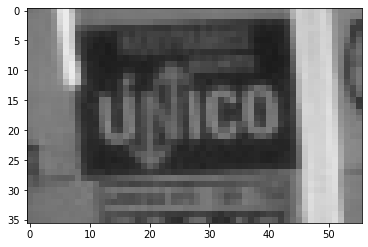

Ujico
([[109, 153], [245, 153], [245, 191], [109, 191]], 'CRNDELARIA', 0.3723611017021682)
([[129, 353], [153, 353], [153, 369], [129, 369]], '405', 0.9996655154905765)
([[91, 419], [131, 419], [131, 433], [91, 433]], 'c8888<', 0.15923909459959937)
([[196.5857864376269, 412.5857864376269], [240.7796349256255, 408.08736670480744], [242.4142135623731, 425.4142135623731], [198.2203650743745, 429.91263329519256]], 'D53663', 0.7814961406648534)


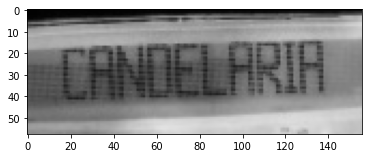

CFNDELARIA
([[340, 30], [392, 30], [392, 60], [340, 60]], 'IT2', 0.16573457410088147)
([[406, 25], [527, 25], [527, 61], [406, 61]], 'DirETo', 0.10705948192863877)
([[359, 182], [473, 182], [473, 219], [359, 219]], 'MENEYER ', 0.5080067566711757)
([[181, 211], [227, 211], [227, 247], [181, 247]], '(78', 0.4326851000890492)
([[458, 234], [480, 234], [480, 242], [458, 242]], '(a', 0.03488614241947473)
([[482, 227], [519, 227], [519, 241], [482, 241]], '808', 0.07291397366685917)
([[413, 277], [449, 277], [449, 291], [413, 291]], '(47560', 0.40141326687426676)


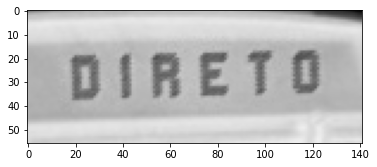

D/r ET0
([[248, 78], [391, 78], [391, 130], [248, 130]], 'Castelo', 0.5805218770019521)
([[284, 190], [402, 190], [402, 218], [284, 218]], "AR CondiCIO' ^d}", 0.24388862574291467)
([[352, 314], [394, 314], [394, 322], [352, 322]], 'ea', 0.03984995054906518)
([[439, 303], [479, 303], [479, 321], [439, 321]], 'D86712', 0.5461811229856511)
([[392.5857864376269, 346.5857864376269], [446.8516952873904, 342.2442060051468], [447.4142135623731, 359.4142135623731], [394.1483047126096, 363.7557939948532]], '7D', 0.4266379457916596)


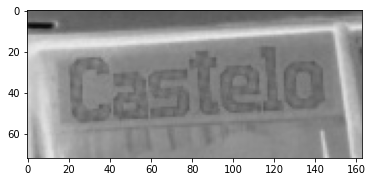

Castelo
([[56, 28], [230, 28], [230, 70], [56, 70]], 'Seospigodagua', 0.1659595152758613)
([[45, 167], [121, 167], [121, 207], [45, 207]], 'PRETOC', 0.4669247035646829)
([[173, 185], [217, 185], [217, 197], [173, 197]], 'Condicio', 0.37502654190961393)


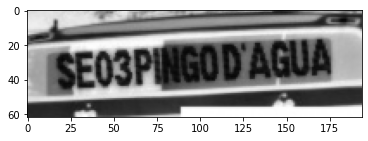

Geo3PiGoDAguA
([[228, 23], [461, 23], [461, 76], [228, 76]], '315 recreio', 0.37237566233088715)
([[358, 106], [502, 106], [502, 130], [358, 130]], 'ARFON { EIONADO', 0.40128590091333755)
([[422, 325], [467, 325], [467, 345], [422, 345]], '441366', 0.3523570732909441)
([[345, 377], [403, 377], [403, 393], [345, 393]], 'KRo-6231', 0.2947678218062472)


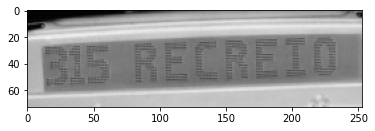

315 RecRETO
([[452, 7], [551, 7], [551, 48], [452, 48]], 'opolis', 0.2755008463922201)
([[487, 81], [587, 81], [587, 97], [487, 97]], 'CONMACONADO', 0.2365998221578667)
([[146, 223], [222, 223], [222, 252], [146, 252]], 'aiosig', 0.12102913353799147)
([[521, 253], [581, 253], [581, 271], [521, 271]], 'RJ 790,031', 0.35692941919656335)
([[392, 270], [464, 270], [464, 278], [392, 278]], 'o aael', 0.006513528284793509)
([[463, 311], [513, 311], [513, 325], [463, 325]], 'LaM 9004', 0.21890381027346528)
([[393, 13], [577, 13], [577, 53], [393, 53]], '335 Cor dowu', 0.04779549048858803)
([[402, 151], [487, 151], [487, 188], [402, 188]], 'Rarndc', 0.3257797836918925)
([[202, 184], [268, 184], [268, 214], [202, 214]], '5qgre', 0.08620007042725353)
([[208, 206], [230, 206], [230, 214], [208, 214]], 'Va', 0.07483004896864322)
([[259.5857864376269, 39.58578643762691], [300.71498585142507, 33.97100848914495], [302.4142135623731, 52.41421356237309], [262.28501414857493, 57.02899151085505]], '0nado'

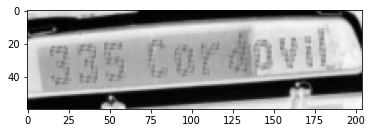

335 Cor dovil
([[296, 31], [470, 31], [470, 62], [296, 62]], 'GasGamupa', 0.04954484824328659)
([[324, 355], [379, 355], [379, 382], [324, 382]], 'oilahil', 0.01154193596742373)
([[398, 394], [462, 394], [462, 418], [398, 418]], 'Lrz-7204', 0.3352526265752909)
([[365.1430466182295, 293.2572186472918], [474.9413677241283, 282.519280373073], [476.8569533817705, 298.7427813527082], [366.0586322758717, 309.480719626927]], '5u09u5', 0.010263064949541215)


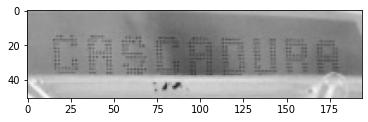

Gascadura
([[339, 281], [373, 281], [373, 295], [339, 295]], '41033', 0.4693506065939247)
([[395.3358994113243, 32.503849116986466], [468.57247877713763, 21.45651273371742], [472.6641005886757, 52.496150883013534], [398.42752122286237, 63.54348726628258]], 'osorio', 0.5687552767880882)
([[317.6750472251236, 43.74506611517306], [403.5203959449127, 32.10083902971813], [406.3249527748764, 64.25493388482694], [320.4796040550873, 76.89916097028187]], 'GEMERAL', 0.17445484265105954)
([[267.4050955543422, 50.33171977498706], [326.2980534105752, 45.736630012350346], [327.5949044456578, 80.66828022501294], [268.7019465894248, 85.26336998764965]], 'TRO1', 0.5881689786911011)
([[289.13701426866953, 196.46032711047206], [384.65003729805983, 188.36377638362836], [385.86298573133047, 222.53967288952794], [290.34996270194017, 230.63622361637164]], 'aterro', 0.556707898449596)
([[419.2567058537528, 307.33103526837755], [447.85749292571256, 304.4855042445725], [448.7432941462472, 317.66896473162245], [

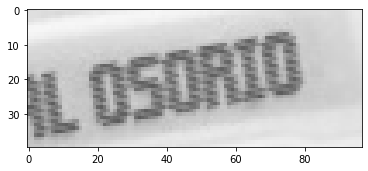

osorio
([[195, 101], [329, 101], [329, 141], [195, 141]], '8 888uea', 0.05238216984456276)
([[207, 201], [326, 201], [326, 230], [207, 230]], 'Ar ConDICIONAYY)', 0.291420200924163)
([[200, 222], [300, 222], [300, 248], [200, 248]], 'ao DeSIO', 0.031037844216126532)
([[326, 286], [401, 286], [401, 307], [326, 307]], 'Mafcopoio', 0.29203781650377864)
([[398, 311], [444, 311], [444, 332], [398, 332]], 'D86728', 0.85432654800326)
([[336.43826238111393, 384.7506099048912], [392.86194639697413, 379.2698249423631], [394.56173761888607, 395.2493900951088], [338.13805360302587, 400.7301750576369]], '7Ls4 6209', 0.1463075892353369)


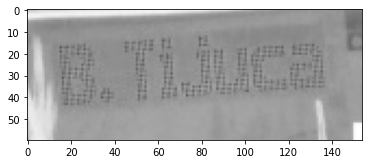

B, T18uea
([[225, 10], [489, 10], [489, 75], [225, 75]], '371 praca secA', 0.5202331357879342)
([[405, 251], [445, 251], [445, 271], [405, 271]], 'GAR', 0.3798298868233285)
([[87, 273], [133, 273], [133, 313], [87, 313]], 'AM', 0.06361424221692188)
([[310, 339], [407, 339], [407, 369], [310, 369]], 'NOVACAP', 0.9611125066047829)
([[409, 393], [435, 393], [435, 409], [409, 409]], '967', 0.9996417717897537)
([[322.8905996075495, 242.3358994113243], [360.6641005886757, 238.89059960754955], [362.1094003924505, 260.6641005886757], [324.3358994113243, 263.1094003924505]], 'BRS', 0.999046827493976)
([[442.36153615896194, 248.85307531127333], [514.9001836142718, 241.37605911173165], [516.6384638410381, 258.14692468872664], [444.0998163857282, 264.62394088826835]], 'ConDICIOT', 0.1713067130516974)
([[368.219131190557, 317.37530495244556], [421.93708211483266, 311.65089097682704], [423.780868809443, 326.62469504755444], [369.06291788516734, 331.34910902317296]], 'Coid', 0.03519931435585022)
([[4

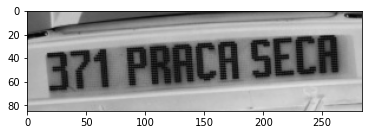

371 prAcA sEcA
([[239, 15], [456, 15], [456, 75], [239, 75]], '797 PEnha', 0.32779753555043295)
([[232, 210], [330, 210], [330, 242], [232, 242]], 'HeLHA-LEd', 0.0902879102095556)
([[303, 311], [345, 311], [345, 327], [303, 327]], 'B31151', 0.8519166392226454)
([[388, 362], [445, 362], [445, 381], [388, 381]], 'LxT 2030', 0.5214525217016407)


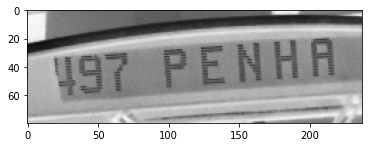

497 PENHA
([[214, 114], [363, 114], [363, 157], [214, 157]], '4774-10', 0.19996778319561498)
([[269, 327], [319, 327], [319, 341], [269, 341]], '50l5', 0.02246677875518799)
([[205, 351], [267, 351], [267, 365], [205, 365]], 'Piso Baixo', 0.9791420066783089)
([[267, 415], [327, 415], [327, 431], [267, 431]], 'DBN 5353', 0.7121015825536013)
([[346.41000317999044, 337.45600508798475], [397.6224718283646, 334.5430712064641], [398.58999682000956, 358.54399491201525], [347.3775281716354, 362.4569287935359]], '2147', 0.9048367790793109)


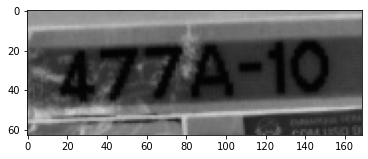

477a210
([[245, 42], [449, 42], [449, 87], [245, 87]], '45 cubango', 0.8661274173883686)
([[391, 105], [425, 105], [425, 117], [391, 117]], 'Con', 0.4462857382406142)
([[433, 103], [485, 103], [485, 115], [433, 115]], 'ConADo', 0.16265137390196108)
([[287, 223], [327, 223], [327, 243], [287, 243]], '2158', 0.03623749688267708)
([[345, 251], [373, 251], [373, 269], [345, 269]], '4105', 0.5026253461837769)
([[275, 307], [333, 307], [333, 323], [275, 323]], 'Muekoi', 0.15636287911923966)
([[422, 296], [486, 296], [486, 320], [422, 320]], '22085', 0.9999955751015998)
([[355, 347], [409, 347], [409, 363], [355, 363]], 'ILTh /5/0', 0.06767024097399302)
([[320.4789396203098, 219.4141973545267], [355.23781298487773, 216.00195269207344], [356.5210603796902, 241.5858026454733], [322.76218701512227, 244.99804730792656]], '#8', 0.08518539807179225)


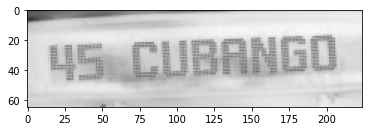

45 cubango
([[319, 16], [543, 16], [543, 79], [319, 79]], '383-Moeziarkzuna', 0.056949159496566204)
([[340, 177], [463, 177], [463, 227], [340, 227]], 'vERJ', 0.35854974389076233)
([[507, 195], [539, 195], [539, 209], [507, 209]], 'Cono', 0.33462074398994446)
([[173, 235], [205, 235], [205, 255], [173, 255]], 'Dua', 0.038822792395945056)
([[535.0421737147789, 192.71265211443367], [575.9178570359602, 186.60308884931453], [577.9578262852211, 196.28734788556633], [537.0821429640398, 203.39691115068547]], 'aeg', 0.02110709733612995)


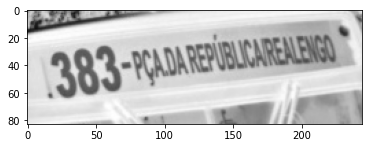

383-abbirrxisg '
([[186, 36], [253, 36], [253, 85], [186, 85]], '112', 0.9992761283391904)
([[194, 225], [335, 225], [335, 279], [194, 279]], 'LeopoldINA', 0.26697674741384647)
([[364, 236], [398, 236], [398, 262], [364, 262]], '4o5', 0.09840011329688722)
([[255, 347], [305, 347], [305, 368], [255, 368]], 'A41298', 0.983183275291581)
([[249.6712678358369, 33.57540888809009], [444.74341649025257, 15.418861169915811], [447.3287321641631, 61.42459111190991], [252.25658350974743, 79.58113883008419]], 'RODOUIARIA', 0.9861595012449516)
([[332.78057847830064, 387.4147520217908], [400.84874786706996, 382.23702468978064], [402.21942152169936, 403.5852479782092], [334.15125213293004, 409.76297531021936]], '{0x385J', 0.034697662366176885)


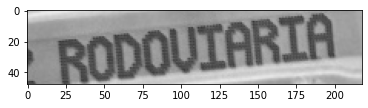

RODOUIARIA
([[280, 24], [479, 24], [479, 69], [280, 69]], 'KERENA-MIEUACV', 0.10037736813413856)
([[265, 197], [309, 197], [309, 217], [265, 217]], "'57' Cruz", 0.060957403847351266)
([[267, 219], [289, 219], [289, 233], [267, 233]], 'G', 0.1644955587144068)
([[20, 218], [88, 218], [88, 266], [20, 266]], 'HH', 0.10020298557934697)
([[153, 249], [181, 249], [181, 267], [153, 267]], '12', 0.018089585022600448)
([[376, 260], [424, 260], [424, 268], [376, 268]], 'agcoooio', 0.15968772129390607)
([[278, 270], [322, 270], [322, 278], [278, 278]], '5', 0.01683479528616605)
([[491, 344], [546, 344], [546, 365], [491, 365]], 'Ltz 1633', 0.22660586194268037)


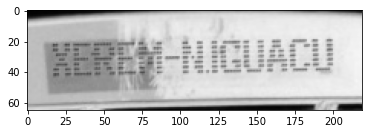

KEREN-NIGUACU
([[295, 45], [485, 45], [485, 83], [295, 83]], '638 M. herMes', 0.3948002652954308)
([[387, 225], [411, 225], [411, 241], [387, 241]], '405', 0.9979210709226535)
([[406, 250], [444, 250], [444, 258], [406, 258]], 'on', 0.020094853027605535)
([[451, 285], [485, 285], [485, 299], [451, 299]], '844678', 0.4307911914187963)
([[391, 337], [437, 337], [437, 351], [391, 351]], '777x J24', 0.03143076981377025)


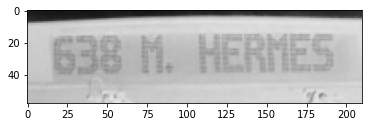

638 M. herMeES
([[190, 26], [441, 26], [441, 83], [190, 83]], '383 rEaleNo@', 0.09683577904230427)
([[300, 355], [348, 355], [348, 375], [300, 375]], 'ii', 0.0066763867568116544)
([[227.05742827528547, 243.50337089551385], [352.744, 232.592], [353.9425717247145, 268.49662910448615], [228.256, 279.408]], 'MALLet', 0.20200578966978755)
([[330.0, 299.0], [438.92020866592816, 283.4407159225452], [441.0, 299.0], [332.07979133407184, 314.5592840774548]], '7u09ud', 0.04691820673423384)
([[365.719631200671, 391.46355744080523], [430.8186157979154, 385.16775209247936], [432.280368799329, 406.53644255919477], [368.1813842020846, 413.83224790752064]], 'Koy 5508;', 0.27502362360769317)


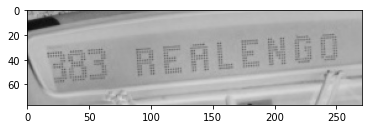

383 rEALENG@
([[298, 17], [518, 17], [518, 69], [298, 69]], 'Fszenoram', 0.03131970504124096)
([[293, 187], [397, 187], [397, 223], [293, 223]], 'EHG RAwna', 0.08135782376625934)
([[433, 191], [459, 191], [459, 205], [433, 205]], '2', 0.10911490587312134)
([[371, 217], [415, 217], [415, 231], [371, 231]], 'l/e', 0.1391152216776953)
([[412, 259], [459, 259], [459, 276], [412, 276]], 'Coid', 0.13554370403289795)
([[351, 287], [397, 287], [397, 305], [351, 305]], 'D aasd', 0.07766514319247662)
([[415, 329], [467, 329], [467, 345], [415, 345]], 'Lil5858', 0.205470035980696)
([[186.51341170750567, 43.6620705367551], [226.75770686333138, 39.04581627419153], [228.48658829249433, 55.3379294632449], [188.24229313666862, 59.95418372580847]], '[6OUOO', 0.010001864377985042)
([[472.51341170750567, 287.6620705367551], [508.7052025048219, 282.9548758841414], [510.48658829249433, 299.3379294632449], [474.2947974951781, 304.0451241158586]], 'Aon', 0.09337669097572761)


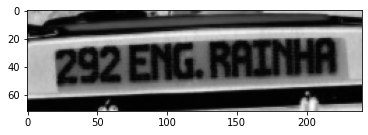

292Eiig Rawha
([[348, 22], [398, 22], [398, 52], [348, 52]], '880', 0.996644616533288)
([[412, 24], [530, 24], [530, 54], [412, 54]], 'alvorada', 0.9143119847754538)
([[368, 178], [414, 178], [414, 204], [368, 204]], 'RNL', 0.2472685597053472)
([[159, 213], [187, 213], [187, 227], [159, 227]], 'Wirin', 0.017611949902507123)
([[182, 200], [228, 200], [228, 230], [182, 230]], '(20227', 0.7708257211599059)


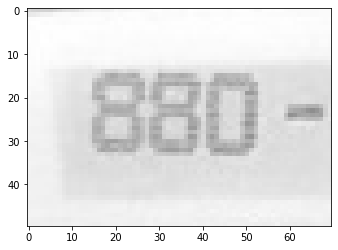

880
([[321, 21], [522, 21], [522, 61], [321, 61]], '110 RODOVIARIA BRs1', 0.23472793455581364)
([[319, 173], [423, 173], [423, 209], [319, 209]], 'Oz VE:', 0.0705821460702836)
([[169, 205], [211, 205], [211, 241], [169, 241]], 'HS ', 0.052453706174796014)
([[365, 267], [405, 267], [405, 281], [365, 281]], 'A41016', 0.6508656467290995)
([[434, 308], [464, 308], [464, 316], [434, 316]], '4530s', 0.045432335101554776)


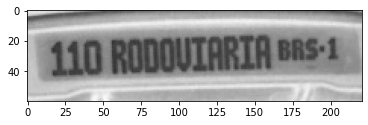

110 RODOUIARIA BRs 1
([[307, 21], [501, 21], [501, 63], [307, 63]], '378 PARADoR', 0.4038661096120566)
([[316, 180], [386, 180], [386, 212], [316, 212]], 'IRAJA', 0.9456213079077425)
([[353, 277], [387, 277], [387, 289], [353, 289]], '811507', 0.7121567959991162)


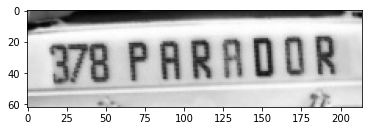

378 PARADOR
([[313, 29], [373, 29], [373, 65], [313, 65]], '1Z4B', 0.9303732514381409)
([[397, 23], [481, 23], [481, 59], [397, 59]], 'Rapido', 0.4799104189268651)
([[353, 194], [434, 194], [434, 218], [353, 218]], 'GuaDALupE', 0.06385642116489286)
([[127, 227], [204, 227], [204, 272], [127, 272]], 'Shaus:', 0.13713565637177974)
([[424, 239], [483, 239], [483, 255], [424, 255]], 'Matconoig', 0.06808998632338939)
([[344.43826238111393, 189.75060990489115], [412.8881834971557, 183.34063433432658], [414.56173761888607, 200.24939009510885], [346.1118165028443, 206.65936566567342]], 'Shopfing', 0.26393639688869397)


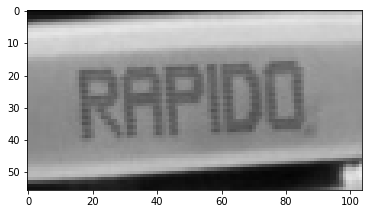

RaPIDO
([[436, 308], [478, 308], [478, 334], [436, 334]], '441', 0.9999275959089672)
([[369, 365], [427, 365], [427, 381], [369, 381]], 'ouh 7989', 0.34251470548179)
([[538.1055728090001, 81.55278640450004], [565.8872168012346, 77.53864726335802], [566.8944271909999, 87.44721359549996], [539.1127831987654, 91.46135273664198]], 'Japor', 0.017037431623937525)
([[367.51341170750567, 289.6620705367551], [418.8542201314083, 285.25042164900515], [420.48658829249433, 301.3379294632449], [368.1457798685917, 305.74957835099485]], '2au5', 0.0019663111306726933)


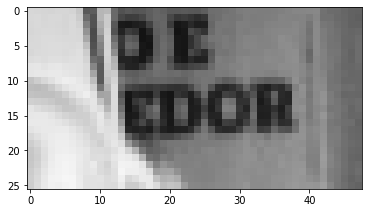

[DoR
([[82, 79], [225, 79], [225, 134], [82, 134]], 'C GFANDE', 0.6624734971176031)
([[206, 240], [228, 240], [228, 248], [206, 248]], '15070', 0.08700349734857954)
([[212, 291], [289, 291], [289, 309], [212, 309]], 'Mafcopoio', 0.06332624671793566)
([[268, 313], [321, 313], [321, 339], [268, 339]], 'D87833', 0.9341896981614871)


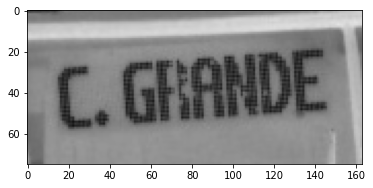

C GFANDE
([[252, 44], [290, 44], [290, 76], [252, 76]], 'd2', 0.306658338322243)
([[230, 244], [258, 244], [258, 276], [230, 276]], '5', 0.9999413498895251)
([[192, 357], [241, 357], [241, 377], [192, 377]], '(30191', 0.8307315219875596)
([[292, 390], [330, 390], [330, 408], [292, 408]], '7016', 0.6461472511291504)
([[284.21114561800016, 37.42229123600033], [375.5601734594347, 28.17649652077737], [377.78885438199984, 64.57770876399967], [286.4398265405653, 73.82350347922264]], 'Tijuca', 0.6991833439433007)
([[169.4050955543422, 50.33171977498706], [255.55926985125095, 44.1747334096149], [257.5949044456578, 80.66828022501294], [170.44073014874905, 87.8252665903851]], 'Barra ', 0.41143130236779046)
([[104.37004658340298, 53.27313509186864], [165.8897059010186, 48.85831446456189], [167.62995341659703, 91.72686490813136], [106.1102940989814, 97.1416855354381]], '843', 0.35579530333603243)
([[137.4050955543422, 252.33171977498705], [219.5188260543045, 245.0979318625381], [221.5949044456578,

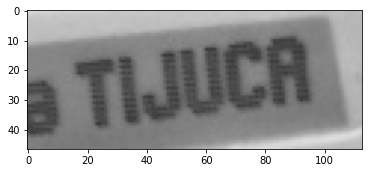

3
([[101, 16], [218, 16], [218, 67], [101, 67]], 'JALUORADA', 0.31955055674769145)
([[211, 27], [259, 27], [259, 47], [211, 47]], 'nn]', 0.028844258902783686)
([[41, 161], [130, 161], [130, 203], [41, 203]], 'GAVeA', 0.3597796062159304)
([[137, 199], [163, 199], [163, 215], [137, 215]], 'aos ]', 0.12344398801038908)
([[81, 281], [117, 281], [117, 295], [81, 295]], '(41372', 0.5717935672790784)
([[146, 315], [197, 315], [197, 333], [146, 333]], 'Kro 6273', 0.3353960371473384)
([[52.37004658340298, 29.27313509186864], [111.82852432394806, 23.78403956788363], [114.62995341659702, 67.72686490813136], [54.17147567605195, 72.21596043211636]], '309 ', 0.7248451113700867)


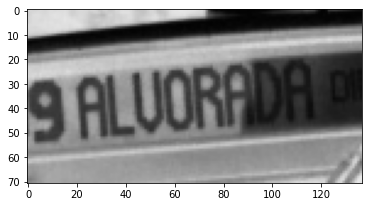

9
([[306, 24], [527, 24], [527, 77], [306, 77]], '415 USIna tjuca', 0.2131093153118243)
([[383, 93], [419, 93], [419, 113], [383, 113]], '20', 0.3282287778298436)
([[498, 203], [579, 203], [579, 222], [498, 222]], 'cohdiciohado', 0.12820771556250848)
([[148, 250], [172, 250], [172, 276], [148, 276]], '0', 0.01779055719011069)
([[166, 250], [198, 250], [198, 288], [166, 288]], 'A-', 0.0721831892621719)
([[369, 303], [419, 303], [419, 319], [369, 319]], 'Ulono', 0.4644656598833501)
([[314.8375236125618, 100.37253305758654], [368.78152373941646, 95.09105931662425], [370.1624763874382, 117.62746694241346], [316.21847626058354, 121.90894068337575]], 'atE', 0.2657112810285005)


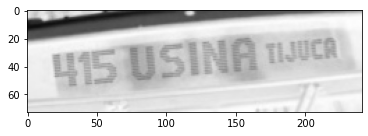

USIna Tuca
([[3, 17], [95, 17], [95, 109], [3, 109]], 'FF', 0.3069225671368768)
([[284, 30], [503, 30], [503, 70], [284, 70]], 'L2oEUCALIPITAL', 0.4523616687240343)
([[311, 195], [388, 195], [388, 243], [311, 243]], 'FlA', 0.09801221439232469)
([[363, 245], [399, 245], [399, 261], [363, 261]], '22od', 0.1392257809638977)
([[384, 272], [451, 272], [451, 289], [384, 289]], 'Mascarello', 0.9725290682868567)
([[403, 297], [453, 297], [453, 315], [403, 315]], 'iveco', 0.8433785736018814)
([[402, 366], [456, 366], [456, 387], [402, 387]], 'LxM 566/', 0.23766936391186724)
([[482.8375236125618, 323.3725330575865], [520.6407963335399, 318.8564146766237], [522.1624763874382, 340.6274669424135], [484.35920366646, 344.1435853233763]], '1225', 0.9995878338813782)
([[482, 22], [528, 22], [528, 54], [482, 54]], '8r53', 0.5182364583015442)
([[340, 36], [384, 36], [384, 68], [340, 68]], '452', 0.7003909945487976)
([[358, 174], [426, 174], [426, 204], [358, 204]], 'WERI', 0.21441806852817535)
([[205, 20

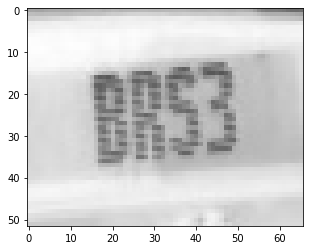

Br53
([[146, 31], [388, 31], [388, 82], [146, 82]], '309 ALuoRaDR %n72', 0.026427461357764442)
([[0, 145], [33, 145], [33, 163], [0, 163]], 'oaa', 0.11707756564713426)
([[161, 205], [229, 205], [229, 241], [161, 241]], '70A BARrkt', 0.01471671019290233)
([[185, 313], [229, 313], [229, 327], [185, 327]], '0aiomn', 0.03575133482724435)
([[256, 360], [313, 360], [313, 380], [256, 380]], '107J02g', 0.06249491332060453)


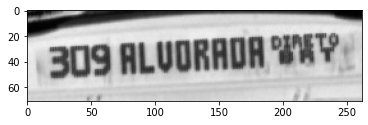

309 RLUORADR ?I7P
([[175, 48], [250, 48], [250, 88], [175, 88]], 'MNt 8', 0.13692847216594436)
([[272, 34], [457, 34], [457, 83], [272, 83]], 'Recaeio', 0.08552427922815227)
([[346, 102], [370, 102], [370, 132], [346, 132]], '2', 0.9800052533637462)
([[305, 223], [335, 223], [335, 237], [305, 237]], '405', 0.7067373910130136)
([[188, 244], [339, 244], [339, 298], [188, 298]], 'IPANena', 0.10968459803720805)
([[255, 377], [307, 377], [307, 397], [255, 397]], '(47540', 0.7587925594337788)
([[330, 416], [405, 416], [405, 444], [330, 444]], "'KPyàze", 0.16353650976110076)


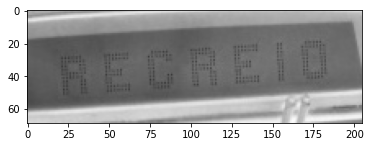

REGRELO


KeyboardInterrupt: ignored

In [12]:
# Google Drive path to dataset
path = ""



for i in range(6327):
    if not os.path.isfile(f"{path}img{i}.jpg"):
        continue
    image = cv2.imread(f"{path}img{i}.jpg")
    image = cv2.GaussianBlur(image, (5,5), 0.5)
    biggerText = get_bigger_box(readText(image))
    biggerText[0] -= 10
    biggerText[1] -= 10
    biggerText[2] += 10
    biggerText[3] += 10
    if biggerText[0] < 0 or biggerText[1] < 0:
        continue
    lettering = crop_lettering(image, biggerText)
    res = readText(255-cv2.cvtColor(lettering, cv2.COLOR_BGR2RGB))
    plt.imshow(255-cv2.cvtColor(lettering, cv2.COLOR_BGR2RGB))
    plt.show()
    print(res[0][1])